# *Lecture 5*

# Introduction to Monte Carlo Methods

| |
|:---:|
|Selected content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Physics Application: Diffusion

A perfume molecule is released from an atomizer in a large open room.
The molecule interacts with the air in the room via a series of elastic collisions, each one of which scatters the molecule in a new direction.
In this way, the perfume is diffused through the room.
If the perfume molecule undergoes an interaction every 0.1 s, how far will it get from the center of the room after 5 minutes?

## Example application of Monte Carlo methods

Monte Carlo methods are typically used in physics for some general applications:
* efficient integration of arbitrary functions, especially for multidimensional integrals
* exploration of a large phase space via random walks and Markov chains

For example, the rate of particle interactions for a particular process, like Z boson production, depends on integrals with the following form:

$$\sigma \sim \int \cdots \int f(\overrightarrow{a},\overrightarrow{b})\ da_x\ da_y\ da_z\ db_x\ db_y\ db_z$$

These methods depend on random sequences of inputs and actions.
The notion of randomness or chance evokes the connection to the famous [Casino in Monte Carlo](http://www.casinomontecarlo.com).

We will focus specifically on the 1-dimensional cases today, and we will follow up with the multidimensional cases later.

## Introduction to Monte Carlo Integration

There is a method even simpler than Gaussian quadrature, where we needed $N$ points at which to evaluate the integral.
If we know the mean value of a function over some interval, then we can easily calculate the value of the integral.

$$I = \int_{a}^{b} f(x)\ dx = (b-a)\langle f \rangle$$

The Monte Carlo method of 
integration uses a large number of random points to estimate the mean value of the function.

The random sequence of values $x_i$ is used to evaluate $f(x_i)$ a total of $N$ times and then calculate the mean value.

$$\langle f \rangle \simeq \frac{1}{N}\sum_{i=1}^{N} f(x_{i})$$

This gives us the very simple general Monte Carlo integration rule:

$$\int_{a}^{b} f(x)\ dx \simeq (b-a) \frac{1}{N}\sum_{i=1}^{N} f(x_{i})$$

Even without any optimization, we can approximate the true integral as long as $N$ is sufficiently large or if we make many "measurements" of $I$ using a finite sequence of points.
The reason is that the random sums tend to be distributed about the expected value of the integral, according to the central limit theorem.

Of course, this works only if the $x_i$ are randomly and uniformly distributed; we cannot expect to get the integral $\int_a^b$ if most of the $x_i$ values are in the first half of the interval!

## Random Number Sequences

A sequence of numbers $r_{1}, r_{2}, \ldots $ is considered
*random* if there are no correlations among the numbers. 
Being random does not mean that all the numbers in the sequence are
equally likely to occur.  If all the numbers in a sequence are
equally likely to occur, then the sequence is called
*uniform*.

An example of a random, but not uniform, sequence in the interval [0,1] is
$$0.11, 0.40, 0.35, 0.23, 0.18$$

An example of a uniform, but not random, sequence is
$$0.20, 0.40, 0.60, 0.80, 1.00$$

We will introduce some numerical methods to determine if a sequence is random and/or uniform. 

### Random-Number Generation on Computers

Since the computer needs an algorithm to produce a "random number sequence,"
such a sequence is deterministic and not truly random.

An example of a truly random sequence would be a sequence of radioactive decays or amplified electronics noise.  Some computers can be attached to physical systems that generate truly random sequences, but that is not necessary for our purposes.  For an amusing but technically serious application, see [Cloudflare's random number generator based on lava lamps](https://blog.cloudflare.com/lavarand-in-production-the-nitty-gritty-technical-details/).

Instead, computers are said to generate *pseudorandom* number sequences that are deterministic and reproducible.  These sequences can be considered "random enough" if the random numbers do not repeat during their use in an algorithm.

The *linear congruent* or *power residue* method is
the common way of generating a pseudorandom sequence of numbers.
A new random number $r_{i+1}$ is generated from the previous number in the sequence $r_i$:

$$   \begin{align}
r_{i+1}  & =   (a\, r_{i} + c)\, \mbox{mod}\,M \\
\end{align}
$$

This method counts on the randomness of round-off errors to generate a random remainder sequence.  In this case, the limits of machine precision help us do something useful.

With the book's numbers of $c = 1, a = 4, M = 9$, we find the following sequence.

[4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0]
[8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 0]


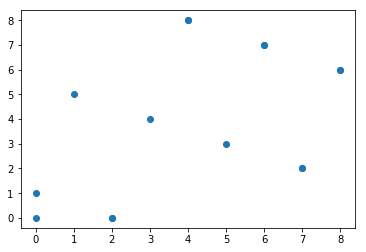

In [4]:
import numpy as np
import matplotlib.pyplot as plt

numbers = []
numbers.append(4)
for i in range(1,15):
    r = (4*numbers[i-1]+1)%9
    numbers.append(r)
print(numbers)

next_numbers = []
for i in range(14):
    next_numbers.append(numbers[i+1])
next_numbers.append(0)
print(next_numbers)

plt.figure()
plt.plot(numbers, next_numbers, "o")
plt.show()

*Exercise*: Why are there only 10 points, when our number series is longer than 10 random numbers?

You should always make a graphical
display of your random numbers. Your visual cortex is quite refined at
recognizing patterns and will tell you immediately if there is one in
your random numbers.  In this particular sequence, the random number sequence does not seem to give uniform coverage in the 2-D plane.  There also seems to be a correlation between numbers $x_i$ and $x_{i+1}$ in the sequence.

In order to obtain a longer sequence, $a$ and $M$ should
be large numbers but not so large that $ar_{i-1}$ overflows the machine representation.
A 32-bit generator may use $M=2^{31}
\simeq 2 \times 10^{9}$.  If your program uses approximately this
many random numbers, you may need to reseed (start the sequence over again with a different initial value) during intermediate steps to avoid the cycle repeating.

In Python we  use  `random.random()`, the Mersenne Twister generator.
It is probably the only random number generator you'll ever have to use.
To initialize a random sequence, you need to plant a seed in it. 
In Python the statement `random.seed(None)` seeds the generator (any generator) with the system time, which is approximately random.  
The problem with this approach is that your calculation is not reproducible.
A better approach is to use a seed like `random.seed(1)`.

Then the random number sequence is generated uniformly on some interval, which is [0,1] for the `random.random()` function.

[0.31922192421225226, 0.8602681062370893, 0.9978232913352738, 0.9212612880557064, 0.6670136391844278, 0.802397060319688, 0.09861477637966554, 0.0047727606629391905, 0.7868577741707817, 0.4094919093816921, 0.28859725050469354, 0.7280200991980951, 0.06753053288600197, 0.3679363169135136, 0.8832624016831381]


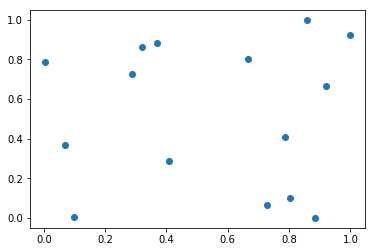

In [11]:
import random

numbers = []
#seed(1)
for i in range(15):
    r = random.random()
    numbers.append(r)
print(numbers)

next_numbers = []
for i in range(14):
    next_numbers.append(numbers[i+1])
next_numbers.append(0)

plt.plot(numbers, next_numbers, "o")
plt.show()

*Exercise*: compare the generated random number outputs for two separate cases:
* With no seed (random seed taken from system clock)
* With seed set explicitly to 1 (compare your results with a neighbor)

Sometimes your eyes can be *too* efficient at spotting patterns, where none exist.
For this reason, it is best to calculate some quantitative estimates of randomness and uniformity.

### Assessing Randomness and Uniformity

Some tests are simple enough
for you to make it a habit to run them simultaneously with your
simulation. In the two examples that follow, we test for
randomness and  uniformity. 

1. A simple test of uniformity evaluates the $k$th moment of a distribution:  

   $$\langle x^{k}\rangle = \frac{1}{N} \sum_{i=1}^{N} x_{i}^{k}$$  
   
   If the numbers are distributed *uniformly*, then the $k$th moment $\langle x^{k}\rangle$ is approximately the $k$th moment of the uniform distribution function $P(x)$:  

   $$\frac{1}{N} \sum_{i=1}^{N} x_{i}^{k} \simeq
    \int_{0}^{1}dx\;
    x^{k}P(x)  \simeq  \frac{1}{k+1}  + O\left(\frac{1}{\sqrt{N}}\right)$$  
   
   If $\langle x^{k}\rangle = \frac{1}{k+1}$ holds for your generator, then you know that the distribution is uniform. 
   If the deviation from $\frac{1}{k+1}$ varies as $1/\sqrt{N}$, then you *also* know that the distribution is random because the $1/\sqrt{N}$ result derives from assuming randomness.  

   A very simple way to check this all in one shot is to calculate  

   $$\sqrt{N} \left| \frac{1}{N} \sum_{i=1}^{N} x_{i}^{k}
-\frac{1}{k+1}\right|$$
   
   and check that it is of order $1$.

2. Another simple test determines the near-neighbor correlation in your random sequence by taking sums of products for small $k$:

   $$C(k) = \frac{1}{N} \sum_{i=1}^{N} x_{i}\ x_{i+k}, \quad (k = 1, 2,
\ldots)$$
   
   If your random numbers $x_{i}$ and $x_{i+k}$ are distributed with the joint probability distribution $P(x_{i}, x_{i+k})=1$ and are independent and uniform, then $C(k)$ can be approximated as an integral:

   $$\frac{1}{N} \sum_{i=1}^{N} x_{i} \,x_{i+k} \simeq \int_{0}^{1}dx
   \int_{0}^{1}dy\, xy \, P(x, y)
 = \int_{0}^{1}dy\, xy   = \frac{1}{4}$$
   
   If $C(k)=\frac{1}{4}$ holds for your random numbers, then you know that they are uniform and independent.
   If the deviation from $\frac{1}{4}$ varies as $1/\sqrt{N}$, then you *also* know that the distribution is random. 

In [24]:
N = 100
numbers = np.zeros(N)
#seed(1)
for i in range(N):
    numbers[i] = random.random()

# Test 1
for k in (1,3,7):
    sum = 0.0
    for i in range(N):
        sum += pow(numbers[i],k)
    check = np.sqrt(N) * abs(sum/N - 1./(k+1.))
    print(k, check)
    
# Test 2
for k in (1,3,7):
    sum = 0.0
    for i in range(N-k):
        sum += numbers[i]*numbers[i+k]
    check = np.sqrt(N-k) * abs(sum/(N-k) - 1./4.)
    print(k, check)     

1 0.21403059093306975
3 0.03603833259452932
7 0.19651738929670814
1 0.3361738396217451
3 0.3142070788725569
7 0.1889479073232944


The first set of numbers should be of order 1 for a uniform sequence.
The second set of numbers should also be of order 1 for a uniform sequence.  Try increasing $N$ to see what happens.

### Quasi-random Number Sequences

There is another class of number sequences called *quasi-random* sequences.
These sequences provide uniform coverage, but they are not random.
A prime example is the <a href="https://en.wikipedia.org/wiki/Sobol_sequence">Sobol sequence</a>.
These quasi-random sequences have specific uniformity properties, but they are not even pseudo-random.
("Quasi-random" is probably a misnomer, but we seem to be stuck with it.)
We will return to quasi-random sequences when we develop multi-dimensional integration.

## Random Walks

You may recall that we had two applications in mind for random number sequences.  The second was the "exploration of a large phase space via random walks."

A random walk is an N-dimensional trajectory whose evolution is governed by a random number sequence.  At each point in the trajectory, a random number determines the directions (and sometimes the step distance) to the next point.

The classic random walk example is diffusion of an air molecule, which follows a three-dimensional trajectory in space.
But the random walk can be in any number of dimensions and in any space.
Another example is the phase space of spins in a 1-D chain of $N$ spin sites (the Ising model).

This "random walk" takes us to random coordinates $(x,y)$ with both $x$ and $y$ in the range $[0,1]$.  This is not exactly what our book calls a random walk.  (Why not?)

<IPython.core.display.Javascript object>


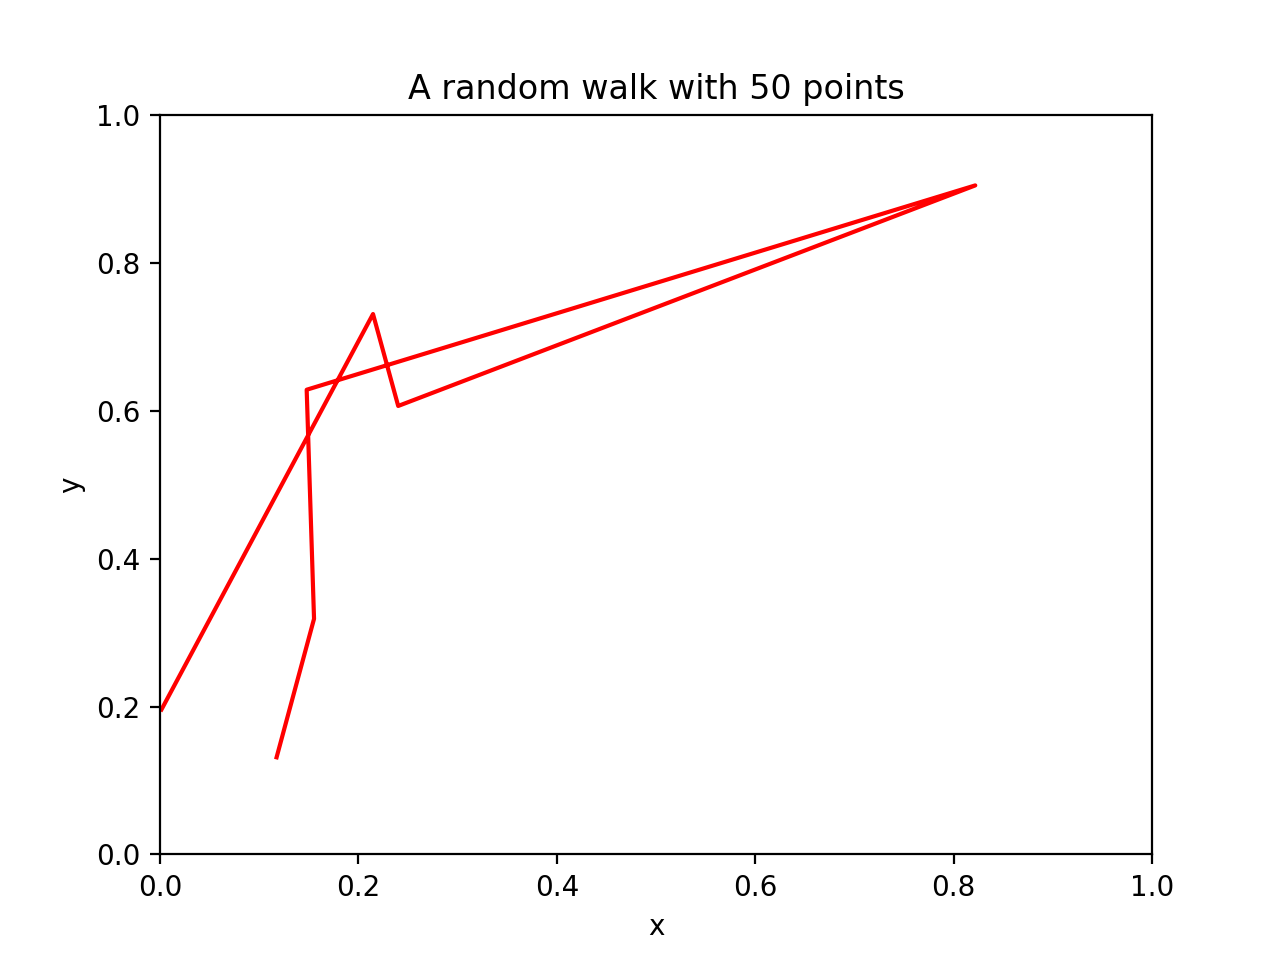

In [25]:
# Random walk from matplotlib documentation

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line

fig1 = plt.figure()

data = np.random.rand(2, 50)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('A random walk with 50 points')
line_ani = animation.FuncAnimation(fig1, update_line, 50, fargs=(data, l),
                                   interval=100, blit=True)
plt.show()

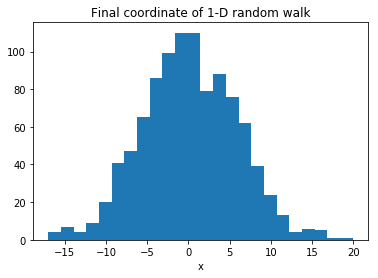

In [29]:
# Random walk in 1 dimension
%matplotlib inline

num_walks = 1000
num_steps = 100
final_xvalues = []

for iwalk in range(num_walks):
    data = np.random.rand(num_steps)
    random_steps = data*2. - 1. # allows for negative steps
    current_x = 0.0
    for random_step in random_steps:
        current_x += random_step
        #if iwalk==1:
        #    print(current_x)
    final_xvalues.append(current_x)

plt.hist(final_xvalues, bins='auto')
plt.xlabel("x")
plt.title("Final coordinate of 1-D random walk")
plt.show()

This histogram shows the end point of many 1-D random walks. 
We can see that the mean value of the position is 0, and the distribution seems to be a Gaussian distribution.
We formalize these observations in the next section.

### Random-Walk Analysis (2-D)
   
Although each step may be in a different direction, the distances
along each Cartesian axis just add arithmetically. Accordingly, the radial distance $R$ from the starting point
after $N$ steps is

$$\begin{align}
R^{2} & =  (\Delta x_{1} + \Delta  x_{2} + \cdots + \Delta
x_{N})^{2} + (\Delta y_{1} + \Delta y_{2} + \cdots +
\Delta y_{N})^{2}  \\
& =  \Delta x_{1}^{2} +\Delta x_{2}^{2} +\cdots +\Delta x_{N}^{2}
+2\Delta  x_{1}\Delta x_{2} +2\Delta x_{1}\Delta  x_{3} +2\Delta
x_{2}\Delta  x_{1} + \cdots   \\
& +\, (x  \rightarrow y)
\end{align}$$
   
If the walk is random, the particle is equally likely to travel in
any direction (positive or negative in each coordinate) at each step.
If we take the average of a large number of such random steps, all the cross terms vanish and we will be left with

$$\begin{align} 
R^{2}_\text{rms} & \simeq   \langle \Delta x_{1}^{2} +\Delta
x_{2}^{2} +\cdots +\Delta x_{N}^{2} + \Delta  y_{1}^{2} +\Delta
y_{2}^{2} +\cdots +\Delta y_{N}^{2} \rangle\\
 & =  \langle \Delta x_{1}^{2} + \Delta  y_{1}^{2}\rangle + \langle \Delta x_{2}^{2}+\Delta y_{2}^{2}\rangle
+\cdots\\
  & =  N \langle  r^{2}  \rangle = N r^2_\text{rms}
\end{align}$$

Finally, 
$$R_\text{rms}  \simeq \sqrt{N} r_\text{rms} $$   
where $r_\textrm{rms} = \sqrt{\langle r^{2} \rangle}$ is the
*root-mean-square* step size. 

If the walk is random, then we expect that after a
large number of steps the average *vector* distance from
the origin $R$ will be 0:  

$$\langle \overrightarrow{R} \rangle = \langle x \rangle \overrightarrow{i} + \langle y \rangle \overrightarrow{j}
  \simeq 0$$
  
But it is still true that the
average *scalar* distance from the origin is $\sqrt{N}
r_\text{rms}$, where each step is of average length $r_\text{rms}$. In
other words, the vector endpoint will be distributed uniformly in
all quadrants, and so the displacement vector averages to zero,
but the average length of that vector does not. For large $N$ values,
$\sqrt{N} r_\text{rms} \ll N r_\text{rms}$ (the value if all steps were in one direction on a straight line), but does not vanish. 

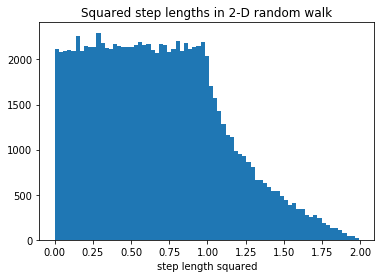

Mean step length squared is  0.6671075158008265
r_{rms} = 0.8167665001705362


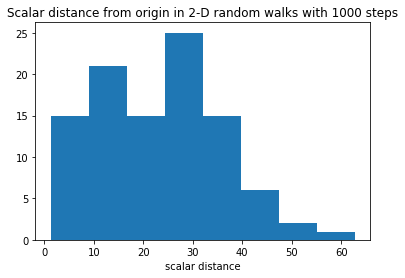

Mean scalar distance is  23.06044943858647


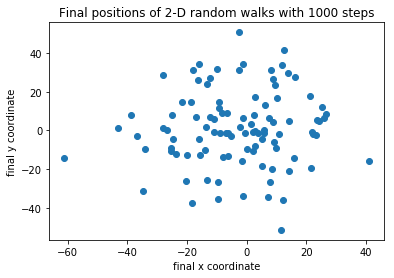

In [38]:
# Random walk in 2 dimensions
%matplotlib inline

num_walks = 100
num_steps = 1000
final_xvalues = []
final_yvalues = []
final_scalar_distance = []
step_length_sq = []
for iwalk in range(num_walks):
    data = np.random.rand(2,num_steps)
    steps = data*2. - 1.
    current_x = 0.0
    current_y = 0.0
    # zip function combines the two lists into ordered pairs
    for (x_step,y_step) in zip(steps[0], steps[1]):
        step_length_sq.append(pow(x_step,2) + pow(y_step,2))
        current_x += x_step
        current_y += y_step
    final_xvalues.append(current_x)
    final_yvalues.append(current_y)
    final_scalar_distance.append(np.hypot(current_x, current_y))

# This is just for plotting the pretty pictures
plt.hist(step_length_sq, bins='auto')
plt.xlabel("step length squared")
plt.title("Squared step lengths in 2-D random walk")
plt.show()
print("Mean step length squared is ", np.mean(step_length_sq))
print("r_{rms} =", np.sqrt(np.mean(step_length_sq)))

plt.hist(final_scalar_distance, bins='auto')
plt.xlabel("scalar distance")
plt.title("Scalar distance from origin in 2-D random walks with %d steps" % num_steps)
plt.show()
print("Mean scalar distance is ", np.mean(final_scalar_distance))

plt.plot(final_xvalues, final_yvalues, "o")
plt.xlabel("final x coordinate")
plt.ylabel("final y coordinate")
plt.title("Final positions of 2-D random walks with %d steps" % num_steps)
plt.show()

This 2-D random walk can be used, for example, to find the distribution of a diffused perfume molecule after some number of collisions.  It can also be used to generate a random walk through an abstract parameter space, known as a Markov chain.

## Application: "Monte Carlo Simulation" of Spontaneous Radioactive Decay

Spontaneous decay is a natural process in which a particle, with
no external stimulation, decays into other particles. Although
the probability of decay of any one particle in any time interval
is constant, the exact time when a specific particle decays is a random event.
In other words, the probability
$\mathcal{P}(t)$ of any one particle decaying per unit time interval is a
constant, yet when that particle decays it is gone forever. Of
course, as the total number $N(t)$ of particles decreases with time, so does the number that decay per unit time.
Nevertheless, the probability of any one
particle decaying in some time interval remains the same for as long as that particle exists.

$$\begin{align} 
\mathcal{P} & =   \frac{\Delta N(t)/N(t)} {\Delta t}  =  - \lambda\\
 &     \  \frac{\Delta  N(t)}{\Delta t} = -\lambda N(t) \\
 & \Delta  N(t) = -\lambda N(t) \Delta t
\end{align}$$

where the constant $\lambda$ is called the *decay rate* and the minus sign indicates a decreasing number.  Because $N(t)$ decreases in time,  the *activity* 
${\Delta N(t)}/{\Delta t}$ 
(sometimes called decay rate) also decreases with time. 

This *finite-difference equation* for $\Delta N(t)$ relates
the experimental quantities $N(t)$, $\Delta N(t)$, and
$\Delta t$. Although a finite-difference equation cannot be integrated the way a
differential equation can, it can be simulated numerically. Because the
process is random, we cannot predict a single value for $\Delta N(t)$, 
although we can predict the average number of decays when
observations are made of many identical systems of $N$ decaying
particles.

When the number of particles $N\rightarrow \infty$ and the observation time interval $\Delta t \rightarrow 0$, our difference equation becomes a differential equation, and we obtain the familiar exponential decay law:

$$
 \frac{\Delta N(t)}{\Delta t} \longrightarrow \frac{dN(t)}{dt} = - \lambda N(t)
$$
   
This can be integrated to obtain the time dependence of the total
number of particles and of the total activity:

$$\begin{align}
N(t) & =  N(0) e^{-\lambda t} = N(0) e^{-t/\tau}\\
\frac{dN(t)}{dt} & =  -\lambda N(0) e^{-\lambda t}= \frac{dN}{dt}(0)
e^{-\lambda t}
\end{align}$$

In this limit ($N\rightarrow\infty$ and $\Delta t \rightarrow 0$) we can identify the decay rate $\lambda$ with the inverse
lifetime: $\lambda =  1/\tau$.
   
The exponential decay formula is a good
description for a large number of particles where
$\Delta N/N \simeq 0$.  However, in nature  $N(t)$ can be a small number, and in that case we
have a statistical and not a continuous process. 
The exponential decay formula becomes less and less accurate as the number of particles gets smaller and smaller.

### Simulation Implementation

Because each individual decay is inherently random, we throw a random number for each particle (atom) to decide if it decays or not.
The probability for each particle to decay per unit time is $\mathcal{P}$,
so a high $\mathcal{P}$ means a particle is likely to decay.

Note that $\Delta t$ matters!  The probability to decay during a 1-second timestep is not the same as the probability to decay during a 2-second timestep.

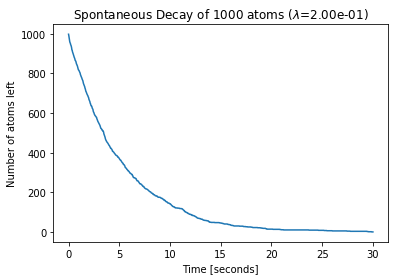

In [45]:
# Particle decay with decay constant lambda1

import numpy as np
import random
import matplotlib.pyplot as plt

seed = 68111                                   
lambda1 = 0.2                                   # Decay constant
max_atoms = 1000
#max_atoms = 100
time_max = 30
nsteps = 1000
number_left = max_atoms                        # Initial value
time_values = np.linspace(0., time_max, nsteps)
time_step = (time_max-0.)/(nsteps-1)
y_values = np.zeros(len(time_values))

time_index = 0
for time in time_values:                       # Time loop
    for atom in range(number_left):            # Decay loop
        decay = random.random()
        if (decay < lambda1*time_step):
            number_left -= 1                   # This atom has decayed
    y_values[time_index] = number_left
    time_values[time_index] = time
    time_index += 1

plt.plot(time_values,y_values)    
plt.title("Spontaneous Decay of %d atoms ($\lambda$=%.2e)" % (max_atoms, lambda1))
plt.xlabel("Time [seconds]")
plt.ylabel("Number of atoms left")
plt.show()

## Monte Carlo Integration

Now we bring the random number sequences back to our original exploration of Monte Carlo integration.

$$\int_{a}^{b} \ dx \  f(x) \simeq
(b-a)\frac{1}{N} \sum_{i=1}^{N} f(x_{i}) = (b-a) \langle f
\rangle$$
with the $x_i$ values are drawn from a random number sequence.

We did not mention it earlier, but the uncertainty associated with this formula is

$$\begin{align}
\sigma_I^2 &\simeq \frac{1}{N} \sigma_f^2 \\
&= \frac{1}{N} \left[ \frac{1}{N} \sum_{i=1}^N f_i^2 - \left( \frac{1}{N} \sum_{i=1}^N f_i \right)^2 \right]
\end{align}$$

That is, the uncertainty in the estimate of the integral decreases as $N^{-1/2}$ with the Monte Carlo method.
This may not sound very promising when compared to uncertainties of $N^{-2}$ achieved with the trapezoidal method, but the real power of the Monte Carlo method will be realized for multidimensional integrals. 

### Example integrations with uniform random number sampling

Evaluate the following integral with the Monte Carlo method.

$$\int_0^1 e^x dx = e -1 \simeq 1.718$$

In [49]:
# Monte Carlo integration with uniform random number sampling
import numpy as np
import random

def f(x):
    return np.exp(x)

N = 1000
# N = 10000
sum = 0.
for i in range(N):
    x = random.random()
    sum += f(x)
print(sum/N)

1.7407805753531758


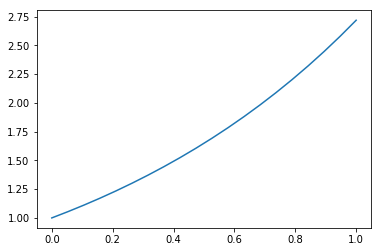

In [48]:
import matplotlib.pyplot as plt
x = np.linspace(0,1,20)
y = f(x)
plt.plot(x,y)
plt.show()

Even though the variation of this function is small, it may still seem strange that we use random numbers uniformly throughout the interval when the $x$ values in the second half of the interval dominate the integral.

Here is another example of 1-D Monte Carlo integration:

$$\int_0^1 \frac{dx}{1+x^2} = \frac{\pi}{4} = 0.785$$

For N= 1000 :  0.7901371286363271 +/- 0.005123805355864282


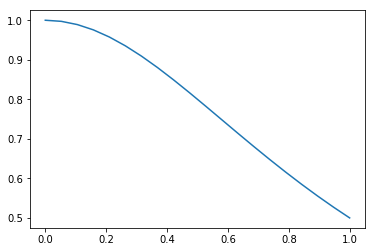

In [53]:
def f(x):
    return 1./(1+pow(x,2))

N = 1000
sum = 0.
sum2 = 0.
for i in range(N):
    x = random.random()
    sum += f(x)
    sum2 += pow(f(x),2)
result = sum/N
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print("For N=", N, ": ", result, "+/-", sigma)

x = np.linspace(0,1,20)
y = f(x)
plt.plot(x,y)
plt.show()

### Importance Sampling of Random Numbers in Integration

We saw that the uncertainty of the Monte Carlo integral is proportional to the variance of the integrand $f(x)$.
This is sometimes glossed over in the discussion of the convergence, but the variance of the integrand is just as important as the factor $1/N$.
If we had a way to reduce the variation in the integrand, we would be able to make the Monte Carlo integral converge more quickly.

Imagine multiplying and dividing the integrand by a carefully chosen normalized weight function $w(x)$:

$$\begin{align}
I &= \int_a^b f(x) dx \\
&= \int_a^b \frac{f(x)}{w(x)} \ w(x) \ dx \\
\end{align}
$$

If we make a change from variable from $x$ to $y$ so that

$$y = \int_a^x w(t) \ dt$$

then we are using the *cumulative probability distribution* of $w(x)$.  (Remember that $\int_a^b w(x) dx = 1$.)

The integral $I$, under the change of variables, becomes

$$
I = \int_{y^{-1}(a)}^{y^{-1}(b)} \frac{f(x(y))}{w(x(y))} \ dy
= \frac{1}{N} \sum_{i=1}^N \frac{f}{w}
$$

If we choose a function $w(x)$ that has similar behavior to $f(x)$, then the integrand will be smooth , with a small variance.  Obviously this will reduce the uncertainty on the integral.

Here is another way to think of the substitution: 
instead of uniformly sampling $x$ to integrate $f(x)$, we uniformly sample $y$ and integrate $f(x)/g(x)$.
A uniform distribution of points in $y$ yields a distribution of point in $x$ distributed as $dy/dx = w(x)$.
That is, the integration points are concentrated in the regions of $x$ where $w(x)$ (and hopefully $f(x)$, by design) are large.

We are sampling the points that are most important to the sum approximating the integral.
For that reason, this kind of sampling is called *importance sampling*.

You may say that we are biasing the final sum toward points that have large $f$ values.  How can a simple $1/N$ adjustment compensate that?


### Example integrations with importance sampling

The challenge of importance sampling is finding a good $w(x)$ and writing the transform $x\rightarrow y$.

Consider our example
$$\int_0^1 \frac{dx}{1+x^2}$$

The integrand is monotonically decreasing , so we will look for a $w(x)$ that is roughly of the same order and decreases with $x$.
A good choice is 
$$w(x) = \frac{1}{3} (4-2x)$$
This has the benefit of already being normalized over the interval [0,1], it has near-unity values of 3/4 at both endpoints, and it is nearly flat everywhere in the interval.

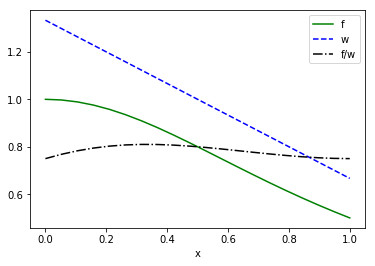

In [62]:
x = np.linspace(0,1,20)
f = 1./(1+pow(x,2))
w = 1./3. * (4-2*x)
fplot, = plt.plot(x, f, "g")
wplot, = plt.plot(x, w, "b--")
ratioplot, = plt.plot(x, f/w, "k-.")
plt.xlabel("x")
plt.legend([fplot, wplot, ratioplot], ['f', 'w', 'f/w'])
plt.show()

According to our recipe
$$\begin{align}
y(x) &= \int_0^x w(t)\ dt \\
&= \int_0^x \frac{1}{3} (4-2t) \ dt \\
&= \frac{1}{3} x (4-x)
\end{align}$$

The x-values for the function evaluation are now $x(y)$:

$$x = 2 - (4-3y)^{1/2}$$

and the limits of integration are $y^{-1}(a) = y^{-1}(0) = 0$ and $y^{-1}(b) = y^{-1}(1) = 1$.

(This is true by construction: can you see why?)

In [65]:
# Monte Carlo integration with importance sampling

def f(x):
    return 1./(1+pow(x,2))

def w(x):
    return (4. - 2.*x)/3.

def xx(y): 
    return 2. - np.sqrt(4 - 3*y)

N = 1000
sum = 0.
sum2 = 0.
for i in range(N):
    y = random.random()
    x = xx(y)
    integrand = f(x)/w(x)
    sum += integrand
    sum2 += pow(integrand,2)
result = sum/N
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print("For N=", N, ": ", result, "+/-", sigma)

For N= 1000 :  0.7853952504172304 +/- 0.00063434683623428


It looks like the uncertainty has been reduced by almost a factor of 10 for $N=1000$.

The method of transforming the variable from $x$ to $y$ via the incomplete integral always works if $w(x)$ is known.
The problem is that $w(x)$ may be a complicated function that is too difficult to invert.

Is there another (simpler?) way to generate random points with a certain probability distribution $w(x)$?

**Yes!** The *von Neumann method (acceptance/rejection method)* can generate a sequence that follows $w(x)$.

In the next lecture, we will investigate two more ways to improve the importance sampling in MC integration:
* von Neumann algorithm (acceptance/rejection method)
* Metropolis algorithm (Markov chain method)
